In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the Excel file
file_path = 'C:/Users/hruth/GENAI/t_mobile/tmobile.xlsx'  # Make sure to update this path
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("Head of the Data:")
print(data.head())

# Check for missing values in each column
missing_values = data.isna().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Head of the Data:
      callkey  callpathSequenceNumber       eventStartDateTime  \
0  6644563163                      50  2021-11-23 00:00:03.000   
1  6644563163                      55  2021-11-23 00:00:07.000   
2  6644563163                      70  2021-11-23 00:00:19.000   
3  6644563163                      77  2021-11-23 00:00:24.000   
4  6644563163                      78  2021-11-23 00:00:33.000   

                    nodeName responsetype response utterance       status  \
0      say_REFWelcomeXfinity          NaN      NaN       NaN  playmessage   
1       say_REFRecDisclosure          NaN      NaN       NaN  playmessage   
2     say_IDPersonalGreeting          NaN      NaN       NaN  playmessage   
3  say_REFAddressConfNoBarge          NaN      NaN       NaN  playmessage   
4   prompt_REFAddressConfirm          ASR      yes      yeah        valid   

   confidence               statusDate statusType  timeInNode  \
0           0  2021-11-23 01:42:13.670          N        

In [11]:
# Calculate the mode for each column
mode_responsetype = data['responsetype'].mode()[0]
mode_response = data['response'].mode()[0]

# Fill missing values with the mode
data['responsetype'].fillna(mode_responsetype, inplace=True)
data['response'].fillna(mode_response, inplace=True)

# Optionally for 'utterance', if you decide to use the mode
mode_utterance = data['utterance'].mode()[0]
data['utterance'].fillna(mode_utterance, inplace=True)

# Check the updated missing values status
print(data[['responsetype', 'response', 'utterance']].isna().sum())


responsetype    0
response        0
utterance       0
dtype: int64


In [16]:
# Calculate the number of unique callkeys
unique_callkeys = data['callkey'].nunique()

print(f"There are {unique_callkeys} unique callkeys in the dataset.")

# Group by 'callkey' and count the number of rows per group
rows_per_callkey = data.groupby('callkey').size()

# Calculate the average number of rows per 'callkey'
average_rows_per_callkey = rows_per_callkey.mean()

print(f"On average, there are {average_rows_per_callkey:.2f} rows per callkey in the dataset.")

There are 100 unique callkeys in the dataset.
On average, there are 17.72 rows per callkey in the dataset.


In [35]:
# Prompt for input to get a specific callkey
specific_callkey = input("Enter the callkey number: ")

# Filter the data for the specified callkey and count the rows
rows_count = data[data['callkey'] == int(specific_callkey)].shape[0]

print(f"The callkey {specific_callkey} has {rows_count} rows in the dataset.")

The callkey 6644563516 has 21 rows in the dataset.


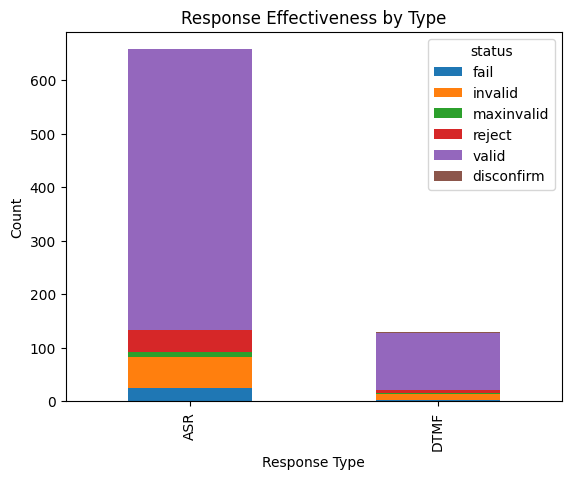

In [20]:
# Group by response type and count statuses
response_effectiveness = data.groupby(['responsetype', 'status']).size().unstack()

# Plot
response_effectiveness.plot(kind='bar', stacked=True)
plt.title('Response Effectiveness by Type')
plt.xlabel('Response Type')
plt.ylabel('Count')
plt.show()


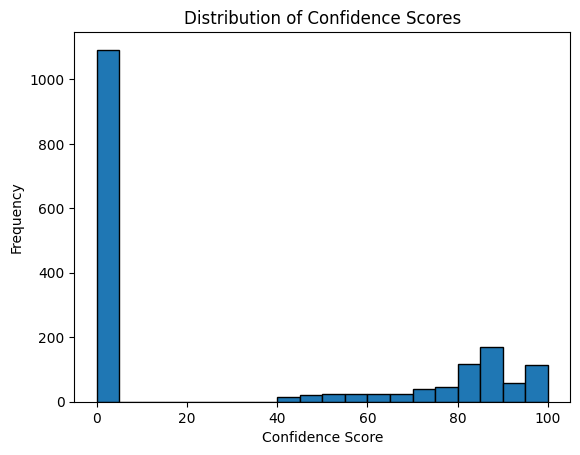

In [ ]:
# Plot histogram of confidence scores
data['confidence'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()

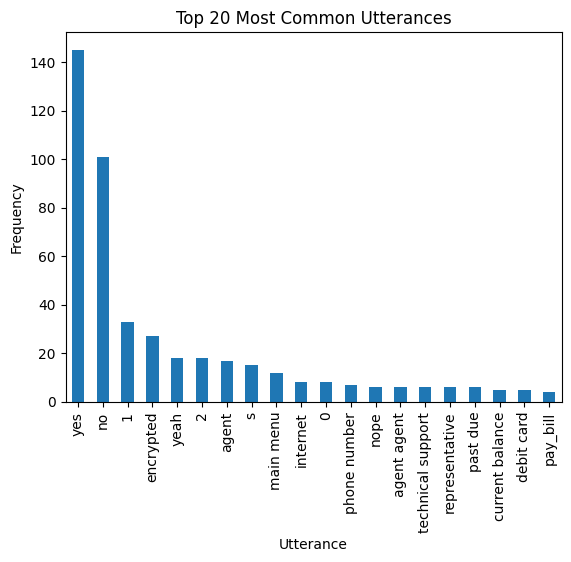

In [25]:
# Note: Actual sentiment analysis requires NLP tools like NLTK or TextBlob
# Here's how you would start by examining utterances
data['utterance'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Most Common Utterances')
plt.xlabel('Utterance')
plt.ylabel('Frequency')
plt.show()


In [24]:
# Find unique node names and count them
unique_node_names = data['nodeName'].unique()
number_of_unique_node_names = len(unique_node_names)

print(f"There are {number_of_unique_node_names} unique node names in the dataset.")
print("List of unique node names:")
print(unique_node_names)

There are 334 unique node names in the dataset.
List of unique node names:
['say_REFWelcomeXfinity' 'say_REFRecDisclosure' 'say_IDPersonalGreeting'
 'say_REFAddressConfNoBarge' 'prompt_REFAddressConfirm'
 'say_AddressConfThanks' 'prompt_NLCollection' 'say_DDTransition'
 'prompt_MainMenu' 'prompt_ALTBillingMenu' 'say_TotalAmtDueEW_CC'
 'prompt_PayTotalAmountEW_CC' 'prompt_MethodOfPayment_EW'
 'prompt_GetCardNum_EW' 'prompt_AskExpDate_EW' 'prompt_AskCVV_EW'
 'say_ConfPayAmtCard_EW' 'prompt_ConfPayAmtCardYN_EW'
 'say_ProcessPaymentCard_EW' 'say_PayErrorDeclined_EW'
 'prompt_CardFailMenu_EW' 'say_LastPayment' 'say_ZeroBalAB'
 'say_PendPayMsg' 'prompt_SpanishTransition' 'prompt_LOBResetFollowUp'
 'prompt_PowerCycleRepeat' 'prompt_ModemPowerCycle'
 'prompt_ModemPowerCycleSecondChance' 'say_ResetNoFollowUp'
 'say_REFXfinityMobile' 'prompt_XMMakeQuickPay' 'prompt_TriageMenu'
 'prompt_MaxErrorTriage' 'say_MaxErrorDisc' 'say_TwoAcctsFound'
 'prompt_TwoAcctsFirstAddress' 'prompt_TwoAcctsSecondAdd

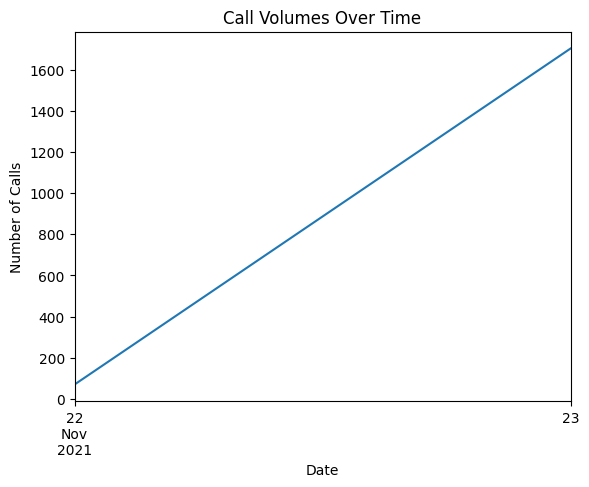

In [26]:
# Convert eventStartDateTime to datetime
data['eventStartDateTime'] = pd.to_datetime(data['eventStartDateTime'])

# Plot call volumes over time
data.set_index('eventStartDateTime').resample('D').size().plot()
plt.title('Call Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()


In [27]:
# Analyze the impact of legal holds
legal_hold_impact = data[data['legalHold'] == 1]['callkey'].nunique()

print(f"Number of unique calls under legal hold: {legal_hold_impact}")

Number of unique calls under legal hold: 11


In [28]:
# Analyze average time till next node
average_transition_time = data['timeTillNextNode'].mean()

print(f"Average transition time to the next node: {average_transition_time} seconds")


Average transition time to the next node: 9.020880361173814 seconds


In [29]:
# This would require more detailed data on call flows or paths
# Assuming you can track path sequences, you could analyze repeated nodes within a single call

# Simplified example: count of repeated visits to the same node within a call
repeated_visits = data.groupby('callkey')['nodeName'].apply(lambda x: x.duplicated().sum())

# Summary statistics
print(f"Average number of repeated visits per call: {repeated_visits.mean()}")

Average number of repeated visits per call: 2.89


In [32]:
# Simple feature engineering
# Assume that high frequency of calls and legal holds might indicate potential churn
data['frequent_calls'] = data['callkey'].map(data['callkey'].value_counts() > 5)  # more than 5 calls might be frequent
data['legal_hold_flag'] = data['legalHold'] == 1

# Create a dummy churn label for demonstration (this should be based on your business understanding)
# Let's assume a customer with more than 5 calls and at least one legal hold is likely to churn
data['is_churn'] = data.apply(lambda x: 1 if x['frequent_calls'] and x['legal_hold_flag'] else 0, axis=1)

# Select features and label
X = data[['timeInNode', 'timeTillNextNode', 'frequent_calls', 'legal_hold_flag']]  # example features
y = data['is_churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[325   0]
 [  0  30]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00        30

    accuracy                           1.00       355
   macro avg       1.00      1.00      1.00       355
weighted avg       1.00      1.00      1.00       355

